In [1]:
from oipd import cli
from datetime import datetime
import matplotlib.pyplot as plt


# Example 1 NVIDIA

In [2]:
# --- example 1 - NVIDIA --- #

input_csv_path = "data/nvidia_date20250128_strikedate20250516_price12144.csv"
current_price = 121.44
current_date = "2025-01-28"
strike_date = "2025-05-16"
# Convert the strings to datetime objects
current_date_dt = datetime.strptime(current_date, "%Y-%m-%d")
strike_date_dt = datetime.strptime(strike_date, "%Y-%m-%d")
# Calculate the difference in days
days_difference = (strike_date_dt - current_date_dt).days
# output_csv_path = "/Users/henrytian/Downloads/results.csv"


In [3]:
days_difference

108

In [4]:
nvidia_pdf = cli.generate_pdf.run(
    input_csv_path=input_csv_path,
    current_price=float(current_price),
    days_forward=int(days_difference),
    risk_free_rate=0.03,
    fit_kernel_pdf=True,
)

In [5]:
nvidia_pdf.head()

,Price,PDF,CDF
0,55.000000,0.000808,0.002453
1,55.100041,0.000819,0.002535
2,55.200082,0.000829,0.002617
3,55.300122,0.000840,0.002700
4,55.400163,0.000850,0.002785


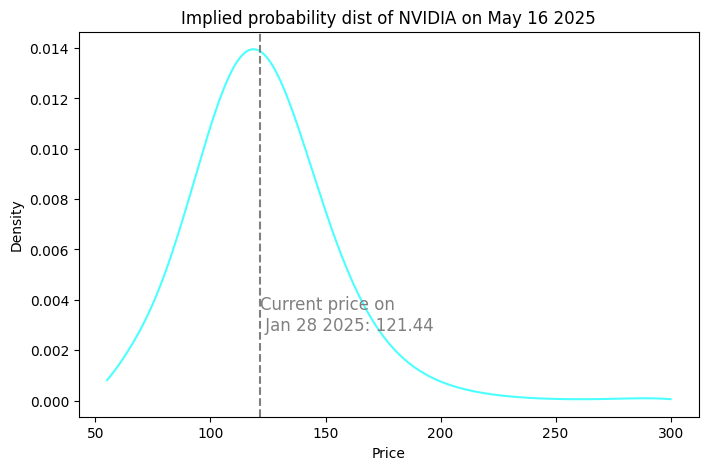

In [ ]:
# Plot probability density function
plt.figure(figsize=(8, 5))

plt.plot(nvidia_pdf.Price, nvidia_pdf.PDF, label="Implied PDF", color="cyan", alpha=0.7)
# Add a vertical line at x = 121.44
plt.axvline(x=121.44, color="gray", linestyle="--")
# Add annotation for clarity
plt.text(
    121.44,
    max(nvidia_pdf.PDF) * 0.3,
    "Current price on\n Jan 28 2025: 121.44",
    color="gray",
    fontsize=12,
    ha="left",
    va="top",
)
# Labels and title
plt.xlabel("Price")
plt.ylabel("Density")
# plt.legend()
plt.title("Implied probability dist of NVIDIA on May 16 2025")
# Show the plot
plt.show()

### Test Draw Figure Through Plotting Function

However the plotting function original accepts ndarray only, this change allows it to accept dataframe. 

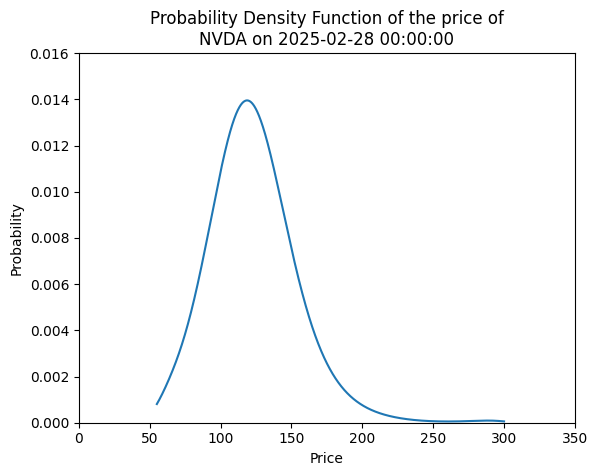

In [18]:
from oipd.graphics import generate_pdf_figure
fig = generate_pdf_figure(
    nvidia_pdf,
    security_ticker="NVDA",
    expiry_date=strike_date_dt,
    # current_price=current_price,
)

# Try use YFinance

In [33]:
import yfinance as yf

ms_ticker = yf.Ticker("MSFT")

In [34]:
ms_ticker.options[:2]

('2025-02-14', '2025-02-21')

In [35]:
ms_option_chain = ms_ticker.option_chain(ms_ticker.options[0])

In [36]:

ms_option_chain.calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT250214C00240000,2025-02-12 15:08:15+00:00,240.0,167.62,168.70,172.20,0.000000,0.000000,1.0,1,5.941409,True,REGULAR,USD
1,MSFT250214C00250000,2025-02-07 14:46:35+00:00,250.0,167.48,158.75,162.20,0.000000,0.000000,3.0,3,5.550784,True,REGULAR,USD
2,MSFT250214C00270000,2025-02-13 19:59:48+00:00,270.0,140.47,138.75,141.75,0.630005,0.450518,1.0,22,4.525395,True,REGULAR,USD
3,MSFT250214C00300000,2025-02-11 16:30:27+00:00,300.0,110.85,108.75,112.20,0.000000,0.000000,3.0,3,3.778321,True,REGULAR,USD
4,MSFT250214C00310000,2025-01-31 16:09:36+00:00,310.0,107.50,98.75,102.20,0.000000,0.000000,1.0,2,3.451173,True,REGULAR,USD


In [37]:
# convert the option chain to a pandas dataframe in columns strike,bid,ask,last_price


ms_options_df = ms_option_chain.calls[["strike", "bid", "ask", "lastPrice"]].copy()

# rename lastPrice to last_price
ms_options_df.rename(columns={"lastPrice": "last_price"}, inplace=True)

In [38]:
ms_options_df.head()

,strike,bid,ask,last_price
0,240.0,168.70,172.20,167.62
1,250.0,158.75,162.20,167.48
2,270.0,138.75,141.75,140.47
3,300.0,108.75,112.20,110.85
4,310.0,98.75,102.20,107.50


In [43]:
# strike date 
strike_date = ms_ticker.options[0]
# convert it to datetime object
strike_date_dt = datetime.strptime(strike_date, "%Y-%m-%d")

strike_date_dt





datetime.datetime(2025, 2, 14, 0, 0)

In [52]:
# forward days
timedelta = strike_date_dt - datetime.now()

timedelta

datetime.timedelta(days=-1, seconds=27018, microseconds=958498)

In [53]:
# convert to integer
days_forward = timedelta.days
days_forward

-1

In [57]:
if days_forward < -1:
  print('error')
  raise 'Error'


if days_forward == -1:
  days_forward = 0
days_forward


0

In [59]:
# current price
# current_price = ms_ticker.history(period="1d").Close[0]
current_price = 400

In [60]:
from oipd.core import calculate_pdf_and_cdf

ms_pdf = calculate_pdf_and_cdf(
    options_data=ms_options_df,
    current_price=current_price,
    days_forward=days_forward,
    risk_free_rate=0.03,
    fit_kernel_pdf=False,
)

TypeError: m > k must hold

todo

not sure why it failed, it could be because strike date is the same date as current date

# Example 2 SPY

In [7]:
# --- Example 2 - SPY --- #

input_csv_path = "data/spy_date20250128_strike20250228_price60444.csv"
current_price = 604.44
current_date = "2025-01-28"
strike_date = "2025-02-28"
# Convert the strings to datetime objects
current_date_dt = datetime.strptime(current_date, "%Y-%m-%d")
strike_date_dt = datetime.strptime(strike_date, "%Y-%m-%d")
# Calculate the difference in days
days_difference = (strike_date_dt - current_date_dt).days
# output_csv_path = "/Users/henrytian/Downloads/results.csv"

In [8]:
spy_pdf = cli.generate_pdf.run(
    input_csv_path=input_csv_path,
    current_price=float(current_price),
    days_forward=int(days_difference),
    risk_free_rate=0.03,
    fit_kernel_pdf=True,
)

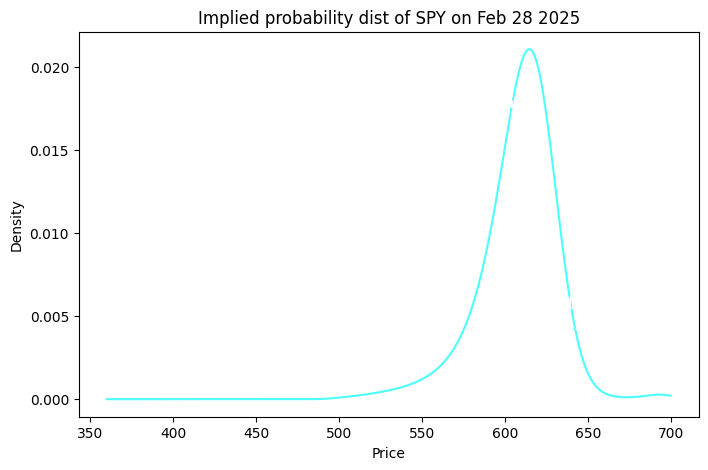

In [ ]:
# Plot probability density function
plt.figure(figsize=(8, 5))
plt.plot(spy_pdf.Price, spy_pdf.PDF, label="Implied PDF", color="cyan", alpha=0.7)
# Add a vertical line at x = 121.44
plt.axvline(x=current_price, color="white", linestyle="--")
# Add annotation for clarity
plt.text(
    current_price,
    max(spy_pdf.PDF) * 0.3,
    "Current price on\n Jan 28 2025: " + str(current_price),
    color="white",
    fontsize=12,
    ha="left",
    va="top",
)
# Labels and title
plt.xlabel("Price")
plt.ylabel("Density")
# plt.legend()
plt.title("Implied probability dist of SPY on Feb 28 2025")
# Show the plot
plt.show()

In [13]:
# --- Example 3 - US Steel --- #
input_csv_path = "data/ussteel_date20250128_strike20251219_price3629.csv"
current_price = 36.29
current_date = "2025-01-28"
strike_date = "2025-12-19"
# Convert the strings to datetime objects
current_date_dt = datetime.strptime(current_date, "%Y-%m-%d")
strike_date_dt = datetime.strptime(strike_date, "%Y-%m-%d")
# Calculate the difference in days
days_difference = (strike_date_dt - current_date_dt).days
# output_csv_path = "/Users/henrytian/Downloads/results.csv"


In [14]:
ussteel_pdf = cli.generate_pdf.run(
    input_csv_path=input_csv_path,
    current_price=float(current_price),
    days_forward=int(days_difference),
    risk_free_rate=0.03,
    fit_kernel_pdf=True,
    solver_method="newton",
)

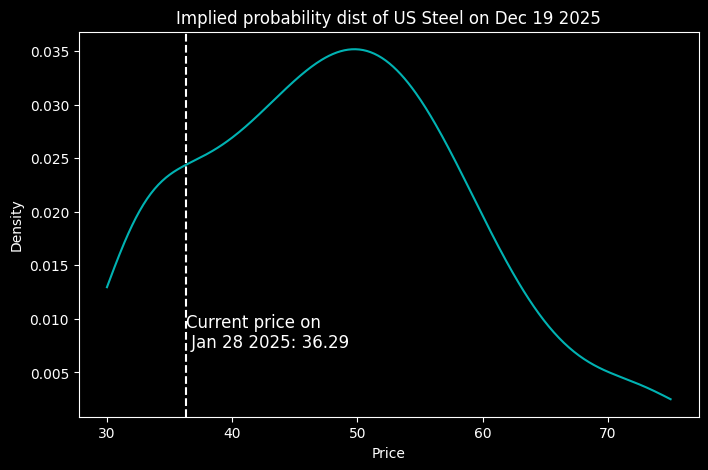

In [15]:
# Plot probability density function
plt.figure(figsize=(8, 5))
plt.plot(
    ussteel_pdf.Price, ussteel_pdf.PDF, label="Implied PDF", color="cyan", alpha=0.7
)
# Add a vertical line at x = 121.44
plt.axvline(x=current_price, color="white", linestyle="--")
# Add annotation for clarity
plt.text(
    current_price,
    max(ussteel_pdf.PDF) * 0.3,
    "Current price on\n Jan 28 2025: " + str(current_price),
    color="white",
    fontsize=12,
    ha="left",
    va="top",
)
# Labels and title
plt.xlabel("Price")
plt.ylabel("Density")
# plt.legend()
plt.title("Implied probability dist of US Steel on Dec 19 2025")
# Show the plot
plt.show()